### Run the cell below!!!

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Dynamics of Complex Biological circuits
## The feedback loop
Biological circuits, much like their electronic counterparts, rely on complex networks of interactions to regulate and control various functions within living organisms. Central to these networks are feedback loops, which play a pivotal role in maintaining homeostasis, orchestrating developmental processes, and enabling adaptive responses to environmental changes.

Feedback loops in biological systems are mechanisms through which a system regulates its own behavior by responding to its own outputs. These loops can be broadly classified into two categories:

1. **Positive Feedback Loops**: These amplify a signal or increase the output of a system. 

2. **Negative Feedback Loops**: These work to dampen or stabilize a system. ### Feedback Loops and Memory in Biological Systems

Feedback loops in biological systems not only regulate immediate responses but also contribute to a form of cellular memory. This memory allows cells to remember and respond to past events, an essential feature for adaptation and survival in changing environments.

Biological memory, in this context, refers to the ability of a cell or a system to maintain a state or response over time, even after the initial stimulus that triggered the response has ceased. This capability is crucial for processes like development, immune responses, and learning in higher organisms.

### Role of Feedback Loops in Memory

1. **Stabilizing Information**: Negative feedback loops are particularly important in stabilizing states within cells. Once a cell commits to a particular state (like becoming a specific cell type during development), negative feedback mechanisms can help lock the system into that state, making it resistant to minor fluctuations in environmental conditions or internal noise.

2. **Maintaining States Over Time**: Positive feedback loops can maintain a response or a state over a prolonged period. Once triggered, a positive feedback loop can sustain its own activity, creating a lasting response until an external signal or a separate negative feedback loop intervenes. This is akin to a "latch" in electronics, where a switch, once flipped, stays in its new position.

3. **Bistability**: Some systems exhibit bistability, where they can stably exist in one of two states. This is often achieved through interlinked positive and negative feedback loops. In such systems, the transition from one state to another requires a significant stimulus, but once the change is made, the system remembers this state, even if the stimulus is removed. This property is called hysteresis and is a powerful mechanism for cellular memory.

We will simulate the dynamics of positive and negative feedback loops and explore their effect in memory.


## Positive  feedback loop
We set up a positive feedback loop in which transcription factor X activates transcription factors $Y_1$ and $Y_2$ which mutually activate each other. The input function at the $Y_1$ and $Y_2$ promoters is an OR gate. At time t=0 X begins to produce from an initial concentration of X=0. Initially, $Y_1$ = $Y_2$ = 0. All production rates are beta = 1 and removal rates are alpha = 1. All of the activation thresholds are K = 0.5. At time = 3 production of X stops.

To simulate this setting with ordinary differential equations, we need to define the ODEs for the concentrations of transcription factors X, $Y_1$, and $Y_2$ over time. The dynamics of the system are governed by the following principles:

1. **Production of X**: Begins at $t = 0 $and stops at $t = 3 $. The production rate is constant ($\beta = 1 $) when it is being produced.
2. **Production of $Y_1 $and $Y_2 $**: Activated by X and mutually activate each other. The input function at their promoters is an OR gate, meaning either X or the other Y factor can activate its production. The production rate ($\beta $) is 1.
3. **Removal of X, $Y_1 $, and $Y_2 $**: Each factor is removed at a constant rate ($\alpha = 1 $).
4. **Activation Thresholds**: All activation thresholds are $K = 0.5 $.

The ODEs can be expressed as follows:

- $\frac{dX}{dt} = \beta \cdot \text{production\_status}(t) - \alpha \cdot X $
- $\frac{dY_1}{dt} = \beta \cdot \text{activation}(X, Y_2) - \alpha \cdot Y_1 $
- $\frac{dY_2}{dt} = \beta \cdot \text{activation}(X, Y_1) - \alpha \cdot Y_2 $

Where $production_status(t)$ is a function that returns 1 if $t < 3 $and 0 otherwise, and `activation(X, Y)` is a function that models the OR gate, returning 1 if either X or Y is above the threshold $K $.

Now, let's implement this in Python and plot the dynamics.
_Note that we set $\beta$ for $Y_2$ as $0.8 \cdot \beta$ so the plots for $Y_1$ and $Y_2$ don't overlap._

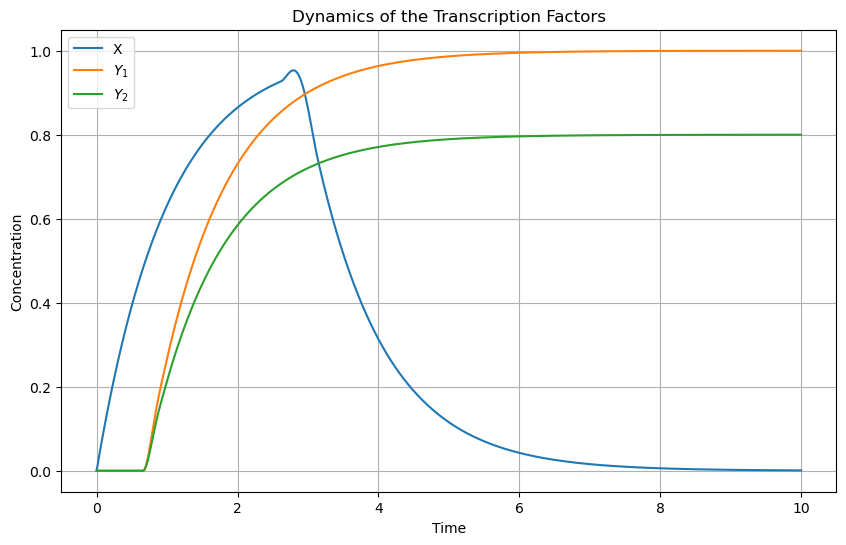

In [54]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
beta = 1
alpha = 1
K = 0.5

# ODE system
def odes(t, state):
    X, Y1, Y2 = state
    production_status = 1 if t < 3 else 0
    activation_Y1 = 1 if X > K or Y2 > K else 0
    activation_Y2 = 1 if X > K or Y1 > K else 0

    dXdt = beta * production_status - alpha * X
    dY1dt = beta * activation_Y1 - alpha * Y1
    dY2dt = (0.8*beta) * activation_Y2 - alpha * Y2

    return [dXdt, dY1dt, dY2dt]

# Initial conditions
initial_state = [0, 0, 0]  # X, Y1, Y2 initially zero

# Time points where the solution is computed
time = np.linspace(0, 10, 500)

# Solve ODE
solution = solve_ivp(odes, [0, 10], initial_state, t_eval=time)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='X')
plt.plot(solution.t, solution.y[1], label='$Y_1$')
plt.plot(solution.t, solution.y[2], label='$Y_2$')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of the Transcription Factors')
plt.legend()
plt.grid(True)
plt.show()


## Negative feedback loop
In the same setting, now $Y_1$ and $Y_2$ mutually repress each other. $X$ activates $Y_1$ and represses $Y_2$. The initial levels are $X = Y_1 = 0$; $Y_2 = 1$.

We'll modify the dynamics of X so that it is no longer governed by an ODE but is a predefined function of time. Specifically, X will be set to 1 for $t < 3$ and will abruptly go to 0 at $t = 3$. This change will simplify the system and make the effects of X's cessation on $Y_1$ and $Y_2$ more apparent.

The updated ODEs for $Y_1$ and $Y_2$ will be:

- $\frac{dY_1}{dt} = \frac{\beta \cdot \text{X}(t)}{K + \text{X}(t)} - \alpha \cdot Y_1 - \frac{\beta \cdot Y_1}{K + Y_2}$
- $\frac{dY_2}{dt} = - \frac{\beta \cdot \text{X}(t)}{K + \text{X}(t)} - \alpha \cdot Y_2 - \frac{\beta \cdot Y_2}{K + Y_1}$

Where $\text{X}(t)$ is a function that returns 1 for $t < 3$ and 0 otherwise.



_Note, for clarity we have simplified the dynamics of X to a step function and set $K$ = 1._



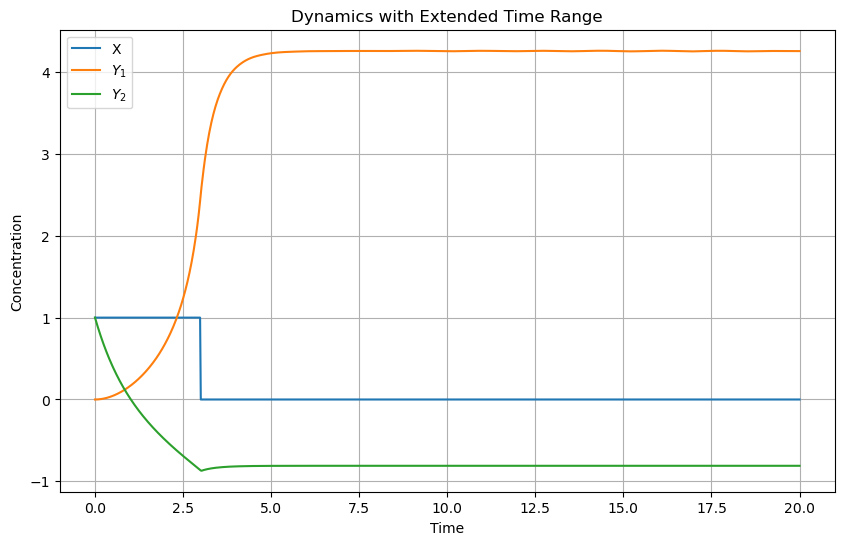

In [74]:
# Parameters
beta = 1
alpha = 1
K = 1

# Updated ODE system with X as a function of time
def X(t):
    """Function to represent the dynamics of X independent of ODEs."""
    return 1 if t < 3 else 0

def updated_odes_v2(t, state):
    Y1, Y2 = state

    # X activates Y1 and represses Y2
    activation_Y1 = beta * X(t) / (K + X(t))
    repression_Y2 = beta * X(t) / (K + X(t))

    # Mutual repression between Y1 and Y2
    repression_Y1_by_Y2 = beta * Y2 / (K + Y2)
    repression_Y2_by_Y1 = beta * Y1 / (K + Y1)

    dY1dt = activation_Y1 - alpha * Y1 - repression_Y1_by_Y2
    dY2dt = -repression_Y2 - alpha * Y2 - repression_Y2_by_Y1

    return [dY1dt, dY2dt]

# New initial conditions: Y1 = 0, Y2 = 1
initial_state_v2 = [0, 1]

# Modified time range
time_range = np.linspace(0, 20, 1000)  # From 0 to 20 with 1000 points

# Solve ODE with new time range
solution_updated_v2 = solve_ivp(updated_odes_v2, [0, 20], initial_state_v2, t_eval=time_range)

# Plot results with the new time range
plt.figure(figsize=(10, 6))
plt.plot(solution_updated_v2.t, [X(t) for t in solution_updated_v2.t], label='X')
plt.plot(solution_updated_v2.t, solution_updated_v2.y[0], label='$Y_1$')
plt.plot(solution_updated_v2.t, solution_updated_v2.y[1], label='$Y_2$')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics with Extended Time Range')
plt.legend()
plt.grid(True)
plt.show()


# # Solve ODE with new conditions
# solution_updated_v2 = solve_ivp(updated_odes_v2, [0, 10], initial_state_v2, t_eval=time)
# 
# # Plot results for the updated system
# plt.figure(figsize=(10, 6))
# plt.plot(solution_updated_v2.t, [X(t) for t in solution_updated_v2.t], label='X')
# plt.plot(solution_updated_v2.t, solution_updated_v2.y[0], label='$Y_1$')
# plt.plot(solution_updated_v2.t, solution_updated_v2.y[1], label='$Y_2$')
# plt.xlabel('Time')
# plt.ylabel('Concentration')
# plt.title('Dynamics with X as a Function of Time')
# plt.legend()
# plt.grid(True)
# plt.show()


**Question.** Explain the memory in each feedback loop.

## SIM Biological Circuits

A Single Input circuit (SIM) is a simplified system where a single input (like a signaling molecule) controls a biological process. This input could be a hormone, a neurotransmitter, a nutrient, or any molecule that triggers a biological response. Imagine a hormone (let's call it Hormone H) that, upon entering a cell, triggers a series of biochemical reactions leading to the production of a specific protein.

ODEs allow us to model the rate of change of concentrations over time in a dynamic biological system. Each component of the SIM can be represented by an ODE that encapsulates its behavior and interactions. For instance, in our example, we might model the concentration of Hormone H, the activation state of a receptor, and the production rate of the protein.

Overview of the SIM:

1. **Components of the SIM**:
   - **Transcription Factor $X$**: Acts as the single input in this module, regulating the expression of genes $Z$ and $Z_2$.
   - **Genes $Z$ and $Z_2$**: Their expression is regulated by the transcription factor $X$, but each responds at a different threshold level of $X$.

### Key Features of the Simulation. LIFO:

1. **Dynamic Regulation**:
   - The transcription factor $X$ is produced up to a certain time point (t = 10) and then decays.
   - Genes $Z$ and $Z_2$ are activated at different threshold concentrations of $X$, reflecting different regulatory dynamics.

2. **Parameter Settings**:
   - `alpha_X, beta_X` etc., are parameters defining the rate of production and decay for $X, Z,$ and $Z_2$.
   - `X_threshold` and `X_threshold2` are the critical concentrations of $X$ that trigger the expression of $Z$ and $Z_2$, respectively.

3. **LIFO (Last In, First Out) Temporal Program**:
   - In the context of this simulation, LIFO refers to the order in which gene expression is turned off as the level of $X$ decreases.
   - Since $Z_2$ has a higher threshold (7) for activation compared to $Z$ (4), it will be the last to be activated and the first to be deactivated as $X$ decreases.
   - This creates a temporal sequence in the gene expression pattern, an important aspect when studying developmental processes or response mechanisms in biological systems.


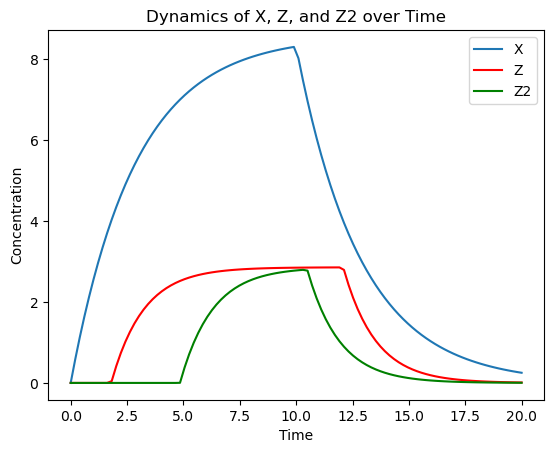

In [75]:


# Define the system of differential equations
def system(conditions, t, alpha_X, beta_X, alpha_Z, beta_Z, X_threshold, alpha_Z2, beta_Z2, X_threshold2):
    X, Z, Z2 = conditions

    # Equation for X
    if t >= 10:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equation for Z
    if X > X_threshold:
        dZdt = beta_Z - alpha_Z * Z
    else:
        dZdt = -alpha_Z * Z

    # Equation for Z2
    if X > X_threshold2:
        dZ2dt = beta_Z2 - alpha_Z2 * Z2
    else:
        dZ2dt = -alpha_Z2 * Z2

    return [dXdt, dZdt, dZ2dt]

# Parameters for X, Z, and Z2
alpha_X = 0.35
beta_X = 3
alpha_Z = 0.7
beta_Z = 2
X_threshold = 4
alpha_Z2 = 0.7
beta_Z2 = 2
X_threshold2 = 7

# Initial conditions
X_0 = 0.0
Z_0 = 0.0
Z2_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [X_0, Z_0, Z2_0], t, args=(alpha_X, beta_X, alpha_Z, beta_Z, X_threshold, alpha_Z2, beta_Z2, X_threshold2))

# Extract X, Z, and Z2
X, Z, Z2 = conditions.T

# Plot results
plt.plot(t, X, label='X')
plt.plot(t, Z, label='Z', color='red')
plt.plot(t, Z2, label='Z2', color='green')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of X, Z, and Z2 over Time')
plt.legend()
plt.show()
